importing data from kaggle

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
path = kagglehub.dataset_download("mrsimple07/laptoppriceprediction")


Path to dataset files: C:\Users\lenovo\.cache\kagglehub\datasets\mrsimple07\laptoppriceprediction\versions\1


findout the content in path folder and reading data

In [ ]:
df = pd.read_csv("data/dataset.csv")
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


splitting data into training and testing sets

In [40]:
from sklearn.model_selection import train_test_split
y = df["Price"]
X = df[["Processor_Speed","RAM_Size","Storage_Capacity","Screen_Size", "Weight"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

inputting features into arrays after scaling and regularizing them. Then making the model learn based on the given data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [41]:

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

comparing the predicted y values with testing y values with mean squared error and variance

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
Train_r2 =  r2_score(y_train, pipe.predict(X_train))

print("MSE : ", mse)
print("R^2 : ", r2)
print("Training R2 : ", Train_r2)

MSE :  32013.40435704242
R^2 :  0.9996474160745367
Training R2 :  0.9995426141809987


we observe that the R^2 value is very close to 1 for our testing dataset, which means that the model that we have trained is a good model. We also notice that the R2 value for the training dataset and the testing dataset are very close to each other, which means it is a good model

In [43]:
pipe.named_steps["model"].coef_

array([ 1.44067501e+02,  5.52427933e+02,  9.34826418e+03,  3.31917182e+01,
       -5.80391135e+00])

The above array represents importance of each feature for prediction. In this, we notice that Storage Capacity is the strongest feature while Weight is the weakest feature.

plotting a graph with y testing and y prediction

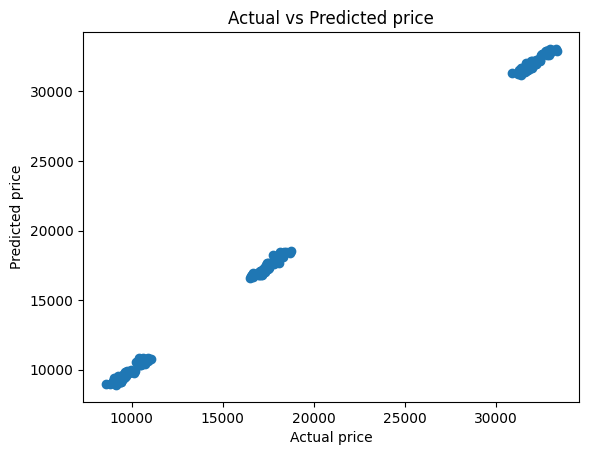

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted price")
plt.show()

Since points lie near diagonal, this is a pretty good and accurate model

Comparing the model which has been scaled and regularized with a baseline model

In [44]:
from sklearn.linear_model import LinearRegression

Baseline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

Baseline.fit(X_train, y_train)
Baseline_pred = Baseline.predict(X_test)

Baseline_r2_score = r2_score(y_test, Baseline_pred)
Baseline_mse = mean_squared_error(y_test, Baseline_pred)

print("Baseline r2 score : ", Baseline_r2_score)
print("Baseline mse score : ", Baseline_mse)

print("Regularized model r2 score : ", r2)
print("Regularized model MSE score : ", mse)

Baseline r2 score :  0.9996472163447738
Baseline mse score :  32031.539130628313
Regularized model r2 score :  0.9996474160745367
Regularized model MSE score :  32013.40435704242


There isn't much of a difference between Baseline R2 score and the R2 score of the model that we have regularized and scaled. 
The key idea we get from this particular result is that regularization helps only when there are many irrelevant features or unstable coefficients. But we have already noticed that the strongest feature "Storage Capacity" far outweighs the other features in terms of importance. Hence, there isn't much of a difference between the baseline and regularized model.